In [39]:
import pandas as pd
import numpy as np
import urllib.request
import pickle

import sklearn.model_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score ,confusion_matrix
from sklearn import tree

from imblearn.over_sampling import SMOTE

from tqdm import tqdm

import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
# load data
data = pickle.load(urllib.request.urlopen('https://github.com/euanbrown247/bank_fraud_project/blob/main/X_y.pkl?raw=true'))
X = data[0]
y = data[1]

In [20]:
model_dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE, 
    max_depth=4
)

In [21]:
states = range(0,20)
output = []
for n,seed in enumerate(states):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seed)

    sm = SMOTE(random_state = seed)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    clf = model_dt

    clf.fit(X_res, y_res)

    #clf.predict(X_test)
    clf.score(X_test, y_test)

    pred = clf.predict(X_test)
    scores = {
        'roundn':n,
        'recall':recall_score(y_test,pred).round(3),  
        'AUC': roc_auc_score(y_test,pred).round(3),  
        'acc': accuracy_score(y_test,pred).round(3),
        'confu':confusion_matrix(y_test,pred)}

    print(scores)
    output.append(scores)

df = pd.DataFrame(output)

df['model'] = df['modeln'].map({0:'gb',1:'rf',2:'dt','n':'naive'})

print(df.groupby('model')[['recall','AUC']].agg(['mean','var']))

{'roundn': 0, 'recall': 0.62, 'AUC': 0.73, 'acc': 0.838, 'confu': array([[20766,  3934],
       [  114,   186]])}
{'roundn': 1, 'recall': 0.428, 'AUC': 0.664, 'acc': 0.894, 'confu': array([[22251,  2492],
       [  147,   110]])}
{'roundn': 2, 'recall': 0.435, 'AUC': 0.669, 'acc': 0.898, 'confu': array([[22330,  2417],
       [  143,   110]])}
{'roundn': 3, 'recall': 0.482, 'AUC': 0.684, 'acc': 0.882, 'confu': array([[21910,  2806],
       [  147,   137]])}
{'roundn': 4, 'recall': 0.523, 'AUC': 0.709, 'acc': 0.891, 'confu': array([[22130,  2610],
       [  124,   136]])}
{'roundn': 5, 'recall': 0.53, 'AUC': 0.708, 'acc': 0.882, 'confu': array([[21908,  2822],
       [  127,   143]])}
{'roundn': 6, 'recall': 0.522, 'AUC': 0.705, 'acc': 0.884, 'confu': array([[21960,  2772],
       [  128,   140]])}
{'roundn': 7, 'recall': 0.478, 'AUC': 0.693, 'acc': 0.904, 'confu': array([[22452,  2259],
       [  151,   138]])}
{'roundn': 8, 'recall': 0.542, 'AUC': 0.717, 'acc': 0.888, 'confu': array([

array([[220200,  27064],
       [  1358,   1378]])

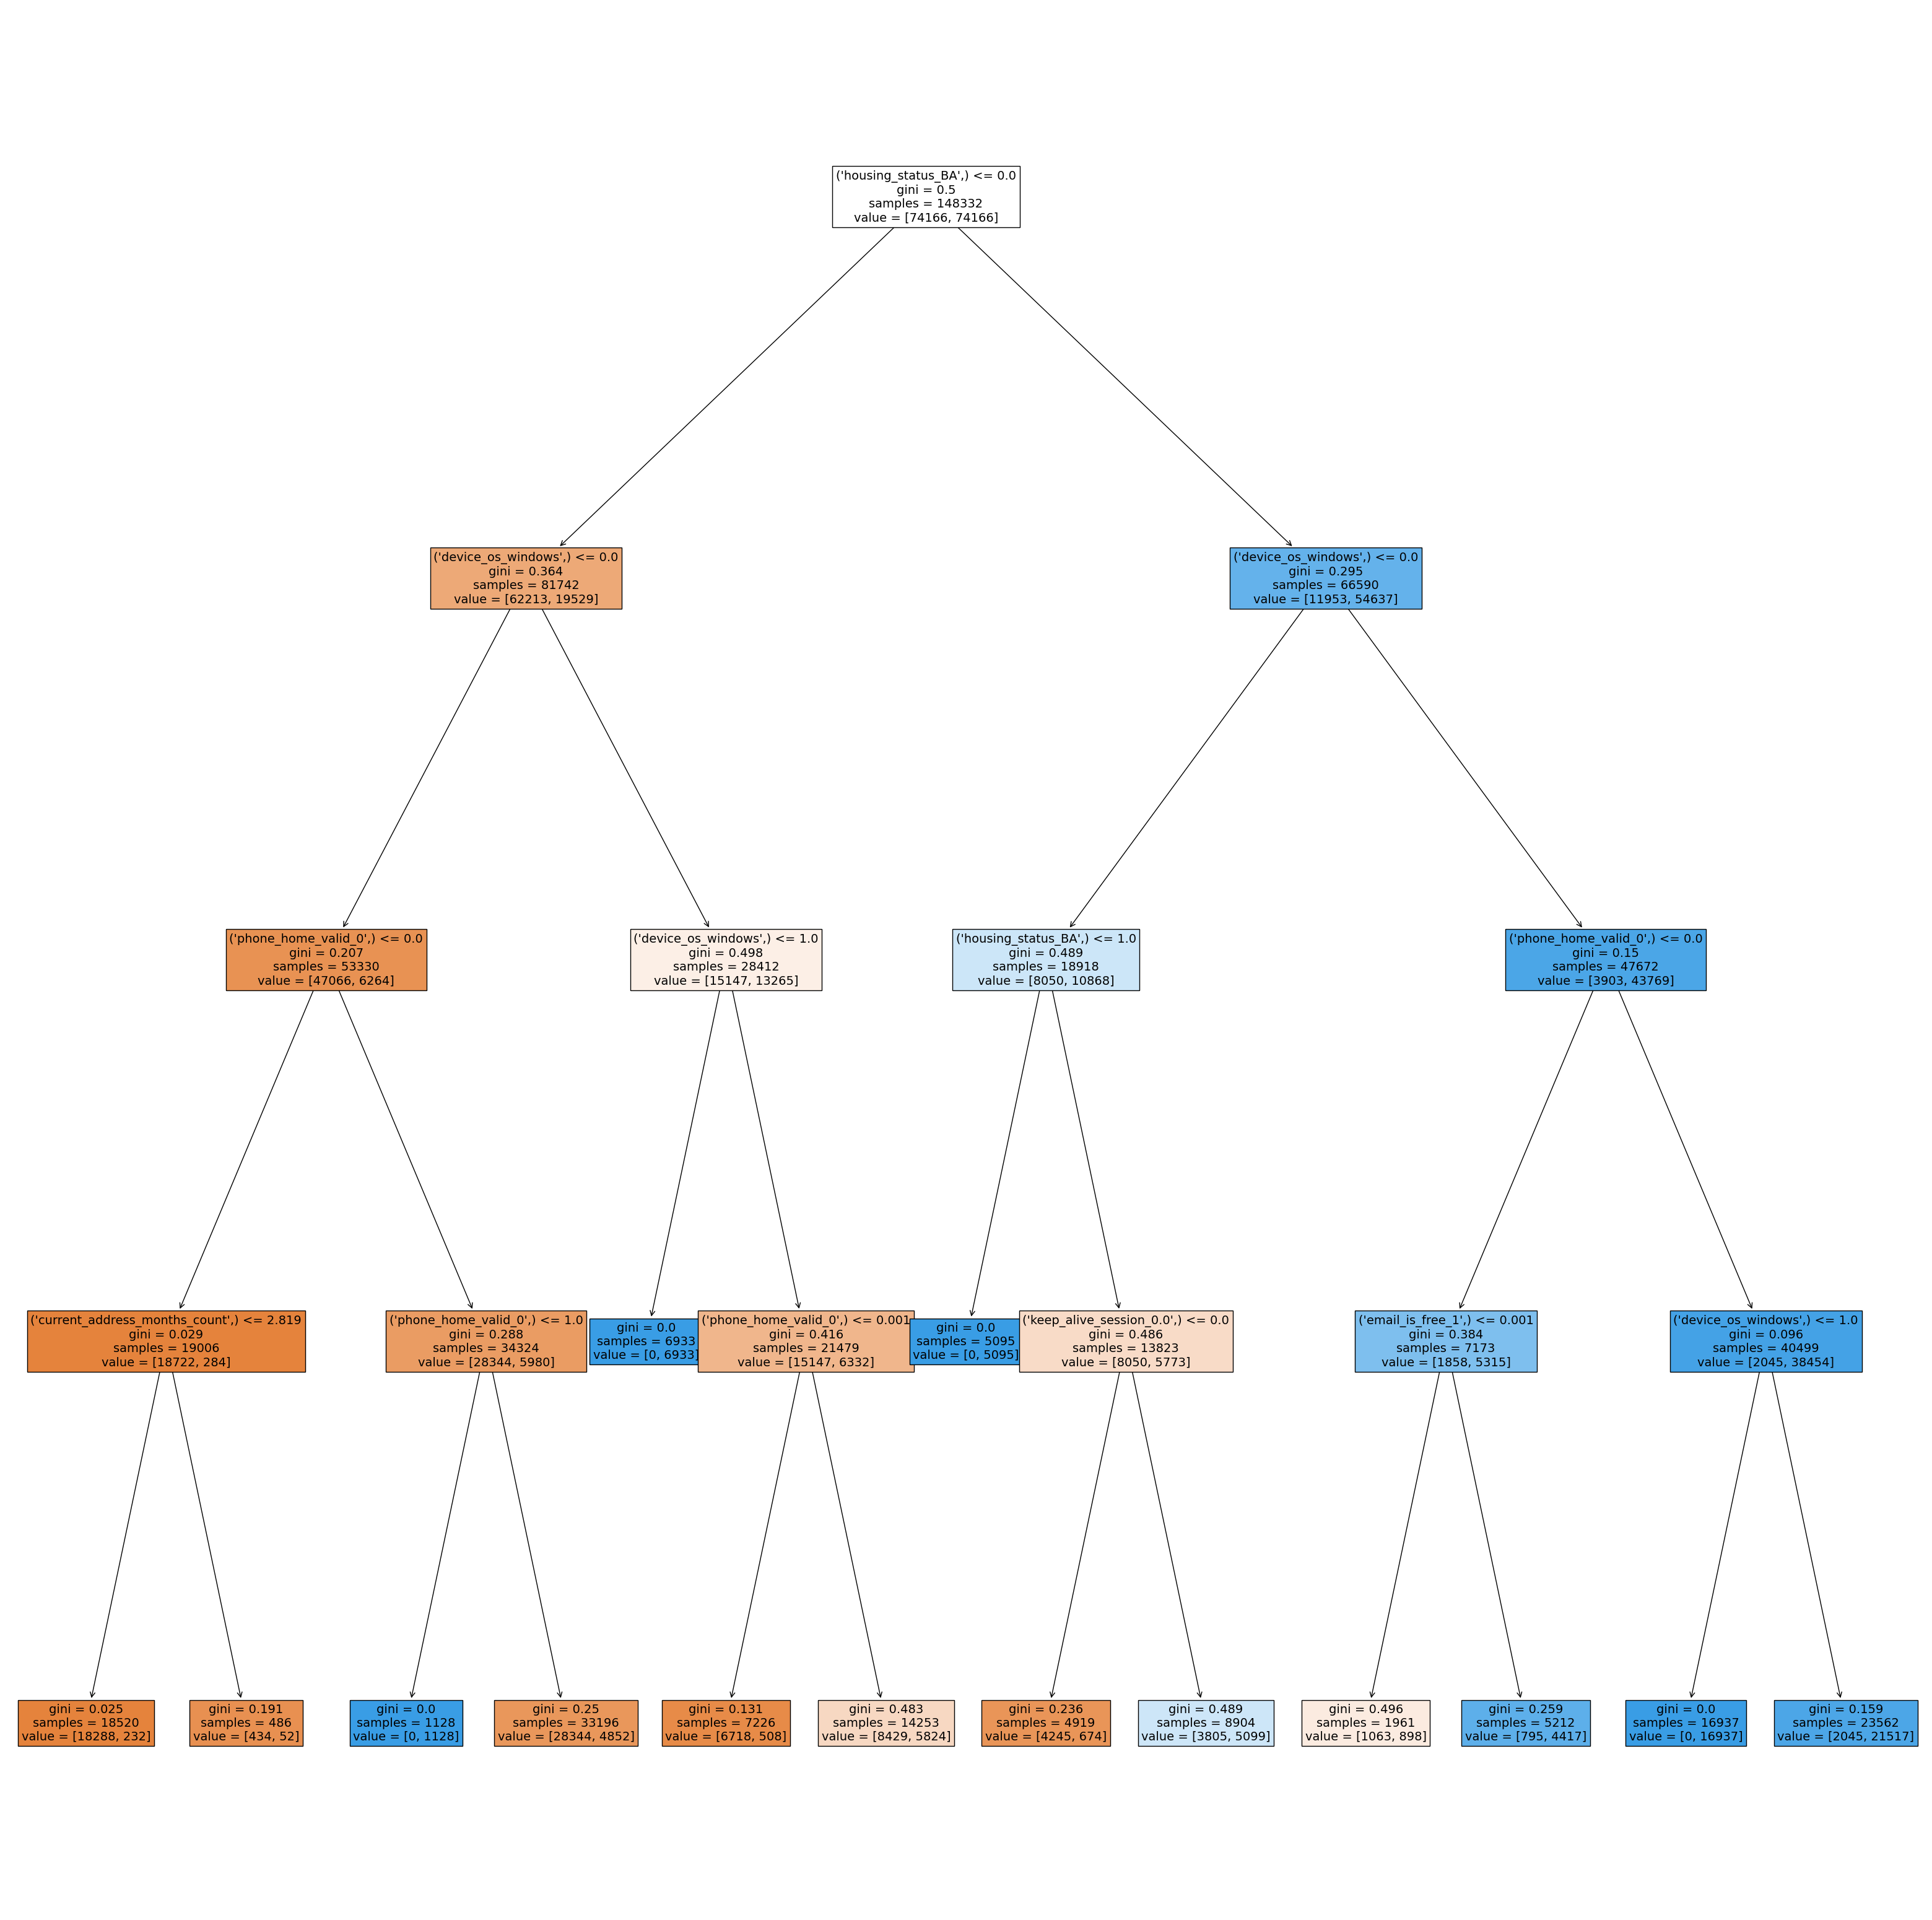

In [49]:
_, ax = plt.subplots(figsize=(40,40)) # Resize figure
tree.plot_tree(model_dt, filled=True, ax=ax,feature_names = X.columns,fontsize =14)
plt.show()